In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.linear_model
import tools
from datetime import date
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as opt
from statsmodels.tsa.stattools import adfuller

In [16]:
# import plt.style.use('dark_background')
pd.options.display.max_rows = 20

**Explanation** 
<br>
This is a modification of the trading strategy on Main, meant to be more slick and application-friendly, with a number of differences. </p>
There's no auxiliary parts, such as band's confidence intervals computation via a statistical bootstrap </p>
The tradable asset is not a ratio of two tradable products, which is not tradable in a straight-forward/amateur manner. Instead, the tradable asset becomes a spread/linear combination of two tradable assets: $ \alpha \cdot Asset_{1} + \beta \cdot Asset_{2} $ </p>
The coefficients $ \alpha $ and $ \beta $ are determined such that, on the train set, stationary metrics are maximized, so that it is somewhat sound to model the obtained linear combination as a OU model. </p>
There's no outlier removal. </p>
The transaction costs are not estimated, and fixed at $ 1 \% $

## EURJPY and USDJPY application

**Import and dataframe setup**

In [12]:
EURJPY1H_df = pd.read_excel('EURJPY1H.xls')
EURJPY1H=np.array(EURJPY1H_df)
USDJPY1H_df = pd.read_excel('USDJPY1H.xls')
USDJPY1H=np.array(USDJPY1H_df)

**Data preparation e run della strategy**

In [13]:
datas=pd.DataFrame(np.log((EURJPY1H-1.11*USDJPY1H)),columns=['logratio']); #not a logratio, it's a logspread
IS_datas=datas[:400]; 
OS_datas=datas[401:];
dt=1/(365*24);
(k,eta,sigma)=tools.MLE_estimator(IS_datas,dt);
(dummy1,eta_OS,dummy2)=tools.MLE_estimator(OS_datas,dt);
SIGMA=sigma/np.sqrt(2*k);
theta=1/k;
leverage=-1;
c=0.01*SIGMA; #arbitrarily fixed
loss=-1.96;
(band,new_lev)=tools.long_run(loss,c,theta,SIGMA,leverage,c/SIGMA);
L=loss*SIGMA;
D=band[1]*SIGMA;
U=band[0]*SIGMA;
ttm=28/365;
W0=1;
(mu_OS,Wt,check_in,check_out)=tools.tradingStrategy(U,D,L,new_lev,W0,ttm,OS_datas,c,eta);

Optimization terminated successfully.
         Current function value: -38.125129
         Iterations: 69
         Function evaluations: 128


**Plot preparation**

In [14]:
#Open positions and close position
openi = [lis[0] for lis in check_in] 
openp = [lis[1] for lis in check_in] 
closei = [lis[0] for lis in check_out] 
closep = [lis[1] for lis in check_out] 
#Trading band
t = np.arange(0,OS_datas.shape[0],10)
Ll = np.full(len(t),loss*SIGMA+eta)
Ls = np.full(len(t),-loss*SIGMA+eta)
Dl = np.full(len(t),band[1]*SIGMA+eta)
Ds = np.full(len(t),-band[1]*SIGMA+eta)
Ul = np.full(len(t),band[0]*SIGMA+eta)
Us = np.full(len(t),-band[0]*SIGMA+eta)
OS_datas = OS_datas.reset_index()

**Plot**    
Plot of the trading strategy on the OS sample. Both the openings and closing of different positions (long/short) and trading bands (long/short) are shown.

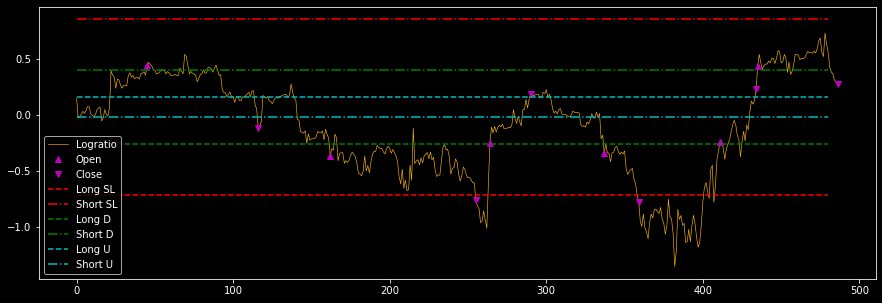

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
plt.style.use('dark_background')
plt.plot(OS_datas['logratio'],color = (1, 0.73, 0.06), linewidth=0.6)
plt.plot(openi,openp,'m^',closei,closep,'mv',t,Ll,'r--',t,Ls,'r-.',t,Dl,'g--',t,Ds,'g-.',t,Ul,'c--',t,Us,'c-.')
plt.legend(['Logratio','Open','Close','Long SL','Short SL','Long D','Short D','Long U','Short U'])
fig.canvas.draw()


Application of the trading strategy over the OS data

## AUDUSD vs NZDUSD sistematic application ##


**Import data** 
Hourly data of AUD/USD and NZD/USD from 25/11/2013  06:00 to 03/12/2021  21:00 (50k datapoints)

In [2]:
AUDUSDH1_df = pd.read_excel('AUDUSD_H1.xlsX')
AUDUSDH1=np.array(AUDUSDH1_df['Open'])
NZDUSDH1_df = pd.read_excel('NZDUSD_H1.xlsX')
NZDUSDH1=np.array(NZDUSDH1_df['Open'])
NZDUSDH1_df.head()

,Time,Open,High,Low,Close,Volume
0,2013-11-25 06:00:00,0.81980,0.82061,0.81958,0.81988,2680
1,2013-11-25 07:00:00,0.81989,0.82047,0.81882,0.82011,3270
2,2013-11-25 08:00:00,0.82009,0.82254,0.81994,0.82196,4986
3,2013-11-25 09:00:00,0.82196,0.82196,0.81936,0.82025,4920
4,2013-11-25 10:00:00,0.82023,0.82110,0.82000,0.82032,2812


**Cointegration** 

Consider risky assets of the form $ Asset_{1} - \beta \cdot Asset_{2} $. To find $\beta$, fit a OLS linear regression on $ Asset_{1} = \beta \cdot Asset_{2} +\epsilon, \epsilon \sim N(0,1)$.Then, in a range $[p\beta,...,\beta -\delta t,\beta,\beta +\delta t,...,(1+p)\beta]$ look for a cointegration coefficient that minimizes the Augmented Dickey Fuller test 

In this section, in several time windows, results from the basic cointegration (OLS), a linear offset minimizing, and ADF minimizing are shown.


This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...
This is gonna take some time...


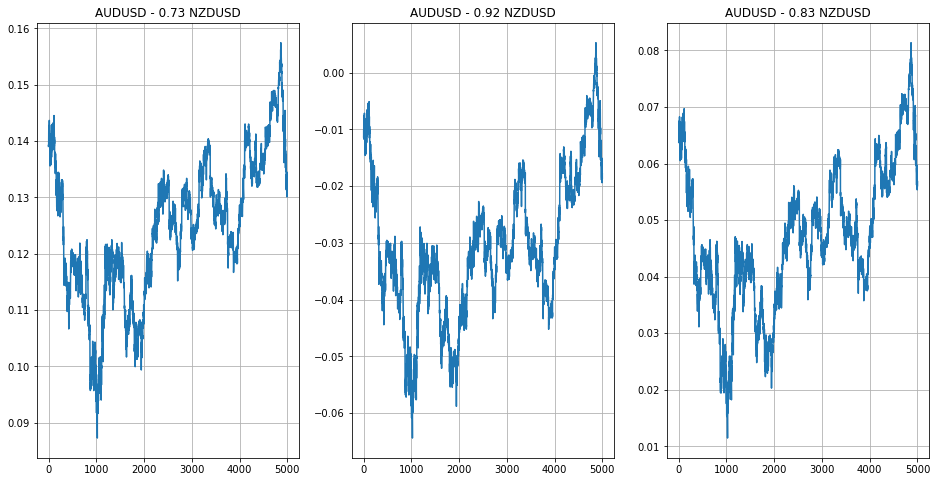

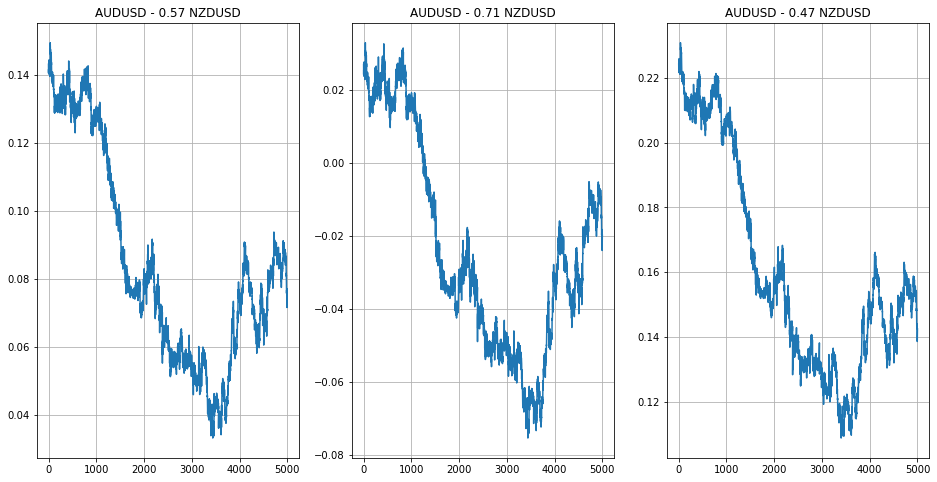

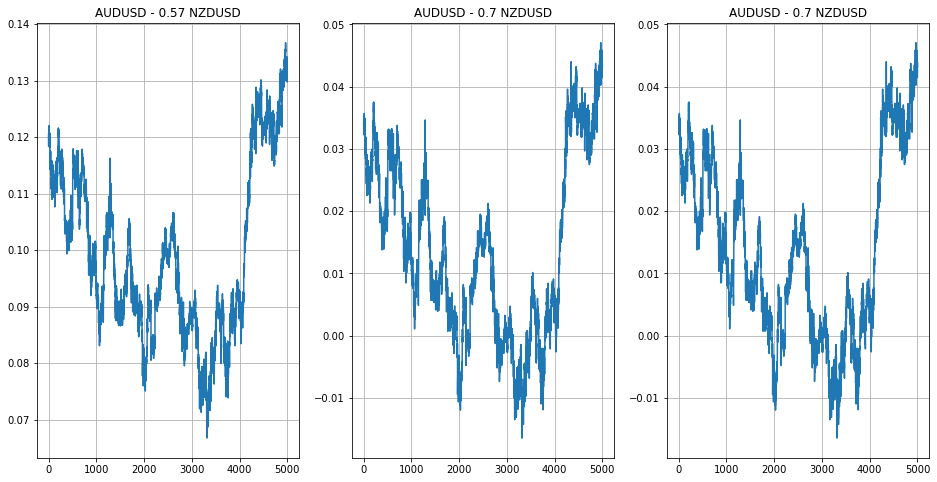

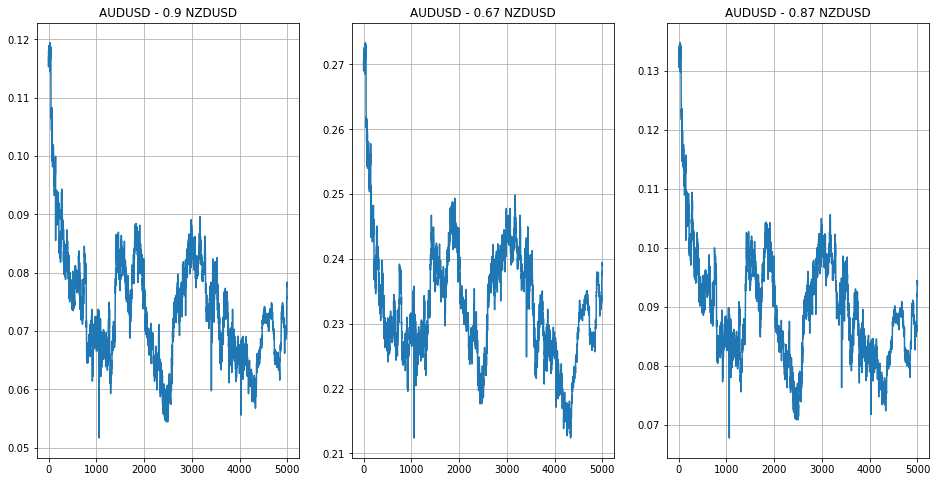

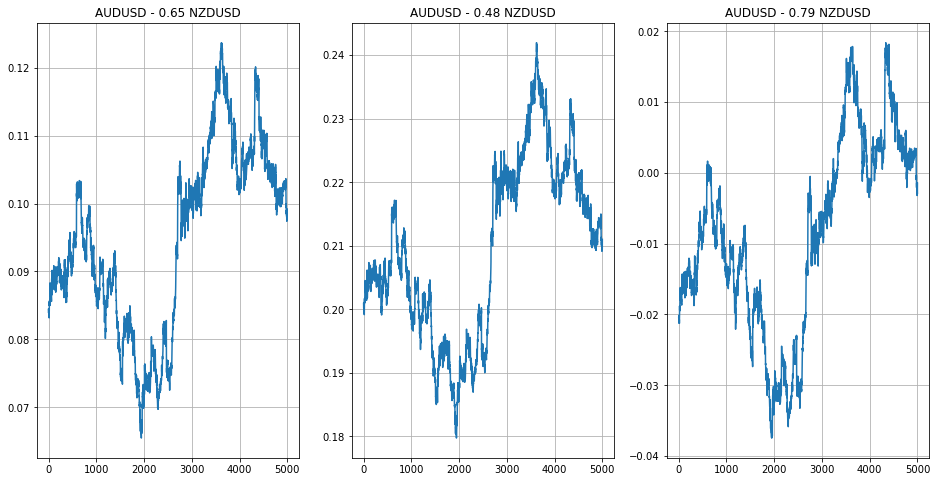

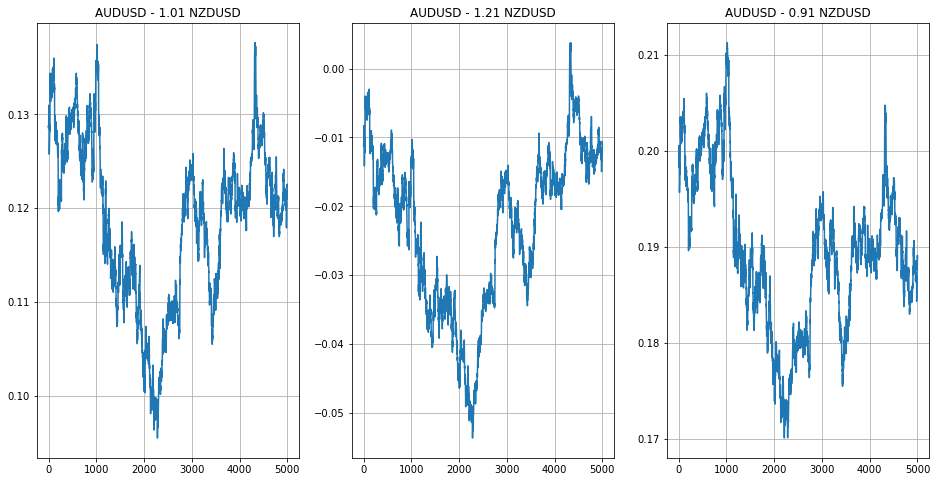

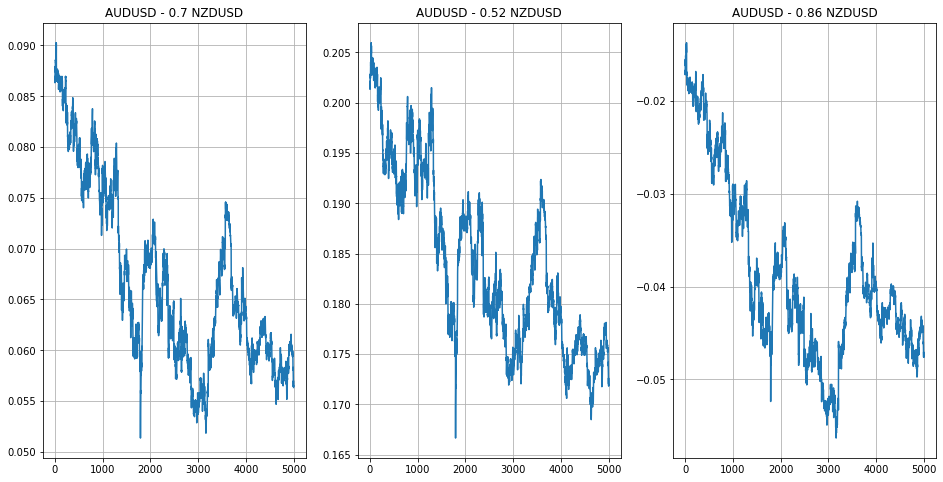

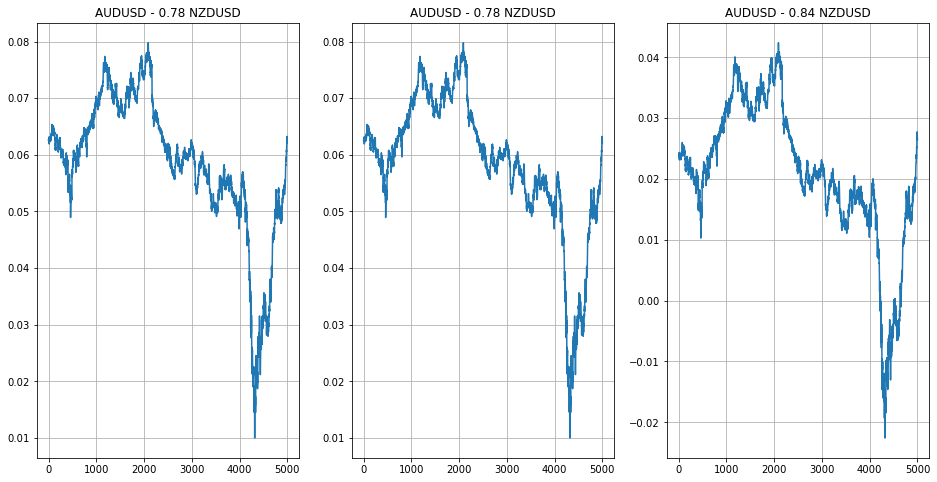

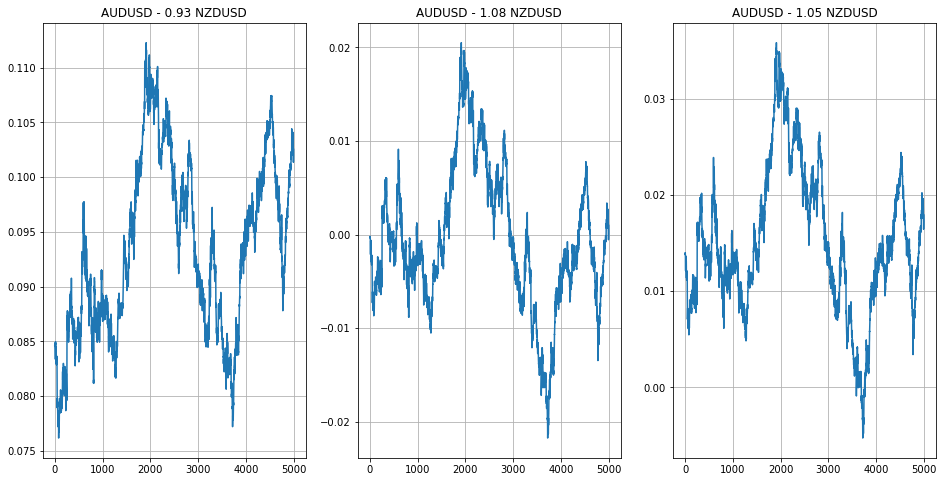

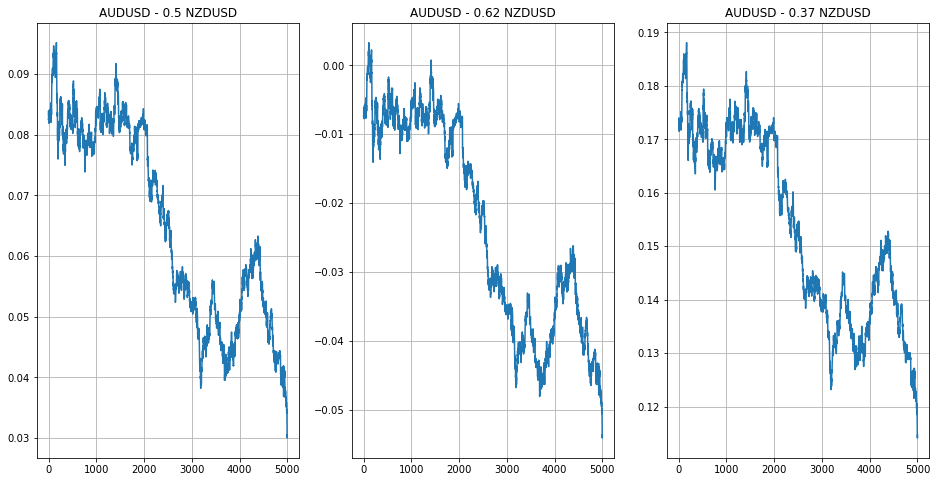

In [6]:
asset1=AUDUSDH1
asset1_name='AUDUSD'
asset2=NZDUSDH1
asset2_name='NZDUSD'
frac=10
n=len(asset1)
for i in range(frac):
    
    ind1=int(n*i/frac)
    ind2=int(n*(i+1)/frac)

    asset2_slice=asset2[ind1:ind2]
    asset1_slice=asset1[ind1:ind2]
    
    fig=plt.figure(figsize=(16, 8))
    ax1=fig.add_subplot(131)
    ax2=fig.add_subplot(132)
    ax3=fig.add_subplot(133)

    interval_step=0.25
    grid_size=0.025

    AUDNZD_basic=tools.basic_cointegrator(asset1_slice,asset2_slice,asset1_name,asset2_name)
    AUDNZD_basic.plot(asset1_slice,asset2_slice,ax1)

    AUDNZD_linear=tools.cointegrator(asset1_slice,asset2_slice,asset1_name,asset2_name)
    AUDNZD_linear.linear_refine(asset1_slice,asset2_slice,interval_step,grid_size)
    AUDNZD_linear.plot(asset1_slice,asset2_slice,ax2)

    AUDNZD_adf=tools.cointegrator(asset1_slice,asset2_slice,asset1_name,asset2_name)
    AUDNZD_adf.adf_optimizer(asset1_slice,asset2_slice,interval_step,grid_size)
    AUDNZD_adf.plot(asset1_slice,asset2_slice,ax3)
    


**Systematic strategy testing**

Split the datasets into $frac$ time windows. Calibrate the strategy on the $i-th$ time window and test it on the $(i+1)-th$

In [4]:
asset1=AUDUSDH1
asset1_name='AUDUSD'
asset2=NZDUSDH1
asset2_name='NZDUSD'
frac=10
n=len(asset1)
Wts=[]
for i in range(frac-1):
    
    ind1=int(n*i/frac)
    ind2=int(n*(i+1)/frac)
    ind3=int(n*(i+1)/frac)
    ind4=int(n*(i+2)/frac)
    currSlice_2=asset2[ind1:ind2]
    currSlice_1=asset1[ind1:ind2]
    nextSlice_2=asset2[ind3:ind4]
    nextSlice_1=asset1[ind3:ind4]
       
    interval_step=0.16
    grid_size=0.02
    
    AUDNZD_linear_cointegrator=tools.cointegrator(currSlice_1,currSlice_2,asset1_name,asset2_name)
    AUDNZD_linear_cointegrator.adf_optimizer(currSlice_1,currSlice_2,interval_step,grid_size)
    
    IS_datas=pd.DataFrame(AUDNZD_linear_cointegrator.return_asset(currSlice_1,currSlice_2),columns=['logratio'])
    OS_datas=pd.DataFrame(AUDNZD_linear_cointegrator.return_asset(nextSlice_1,nextSlice_2),columns=['logratio'])
    
    dt=1/(365*24);
    (k,eta,sigma)=tools.MLE_estimator(IS_datas,dt);
    (dummy1,eta_OS,dummy2)=tools.MLE_estimator(OS_datas,dt);
    SIGMA=sigma/np.sqrt(2*k);
    theta=1/k;
    leverage=-1;
    c=0.01*SIGMA; #arbitrarily fixed
    loss=-1.96;
    (band,new_lev)=tools.long_run(loss,c,theta,SIGMA,leverage,c/SIGMA);
    L=loss*SIGMA;
    D=band[1]*SIGMA;
    U=band[0]*SIGMA;
    ttm=28/365;
    W0=1;
    
    (mu_OS,Wt,check_in,check_out)=tools.tradingStrategy(U,D,L,new_lev,W0,ttm,OS_datas,c,eta);
    Wts.append(Wt[0])
    print("Return on {}-th time window: {}%".format(i+1,np.int(100*(Wt[0]-1))))
  

This is gonna take some time...
Return on 1-th time window: 98%
This is gonna take some time...
Return on 2-th time window: -19%
This is gonna take some time...
Return on 3-th time window: 773%
This is gonna take some time...
Return on 4-th time window: 1160%
This is gonna take some time...
Return on 5-th time window: 269%
This is gonna take some time...
Return on 6-th time window: -42%
This is gonna take some time...
Return on 7-th time window: 4%
This is gonna take some time...
Return on 8-th time window: 214%
This is gonna take some time...
Return on 9-th time window: 5%
